In [1]:
import pandas as pd

In [2]:
ppg_finalised_features=pd.read_csv('PPG_Finalised.csv')#Reading the ppg finalised dataset

In [3]:
ppg_finalised_features.head()

,Sex(M/F),Age(year),Height(cm),Weight(kg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,45,152,63,97,27.268006,Stage 2 hypertension,6.874442,-26.276675,13.268578,6.604219,-13.419384,-10.309675,1.460167,-4.973057,-5.168877,-2.865429,-2.842754,4.394693,4.481392,3.801316,-3.292828,-1.375442,2.333204,3.550070,-0.454649,-0.300077,-1.354707,-3.518339,-0.817157
1,0,50,157,50,76,20.284799,Stage 2 hypertension,5.159124,-2.502626,-6.762113,-4.462335,4.832346,-4.531561,-2.889399,0.477159,2.368463,1.272849,-1.995750,0.569276,-1.050329,0.887410,-0.015154,-0.238360,0.679078,-0.406106,1.120136,1.482796,-0.099423,-0.302771,1.489630
2,0,47,150,47,79,20.888889,Normal,6.847518,-0.656525,-6.195787,-2.688312,3.748400,-4.270678,-3.660029,1.816695,-0.057156,1.901490,-1.315155,-0.399230,-1.107734,1.545901,-0.621452,1.137124,-0.954881,0.087972,0.053862,0.633556,-0.083866,0.131694,-1.392140
3,1,45,172,65,87,21.971336,Prehypertension,1.323732,-21.503364,2.718157,-1.868950,-4.684047,5.366739,-6.550992,0.907731,3.427119,-0.614211,2.359187,-4.396649,-1.647784,0.347119,-2.086219,-1.842610,0.170575,0.180303,-2.153899,1.181756,-0.171474,-0.923647,0.402769
4,0,46,155,65,73,27.055151,Prehypertension,1.459466,0.432907,-9.537420,-0.906677,1.538733,-3.219885,-3.096710,2.559676,-2.406415,2.473865,0.254932,-2.116329,2.199281,-0.485608,0.304128,0.220050,0.087176,0.021992,-0.496049,-1.387934,-0.004746,-0.217980,1.494885


In [4]:
len(ppg_finalised_features)

628

In [5]:
X=ppg_finalised_features.drop("Hypertension",axis=1)#independent features

In [6]:
X.head()

,Sex(M/F),Age(year),Height(cm),Weight(kg),Heart Rate(b/m),BMI(kg/m^2),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,45,152,63,97,27.268006,6.874442,-26.276675,13.268578,6.604219,-13.419384,-10.309675,1.460167,-4.973057,-5.168877,-2.865429,-2.842754,4.394693,4.481392,3.801316,-3.292828,-1.375442,2.333204,3.550070,-0.454649,-0.300077,-1.354707,-3.518339,-0.817157
1,0,50,157,50,76,20.284799,5.159124,-2.502626,-6.762113,-4.462335,4.832346,-4.531561,-2.889399,0.477159,2.368463,1.272849,-1.995750,0.569276,-1.050329,0.887410,-0.015154,-0.238360,0.679078,-0.406106,1.120136,1.482796,-0.099423,-0.302771,1.489630
2,0,47,150,47,79,20.888889,6.847518,-0.656525,-6.195787,-2.688312,3.748400,-4.270678,-3.660029,1.816695,-0.057156,1.901490,-1.315155,-0.399230,-1.107734,1.545901,-0.621452,1.137124,-0.954881,0.087972,0.053862,0.633556,-0.083866,0.131694,-1.392140
3,1,45,172,65,87,21.971336,1.323732,-21.503364,2.718157,-1.868950,-4.684047,5.366739,-6.550992,0.907731,3.427119,-0.614211,2.359187,-4.396649,-1.647784,0.347119,-2.086219,-1.842610,0.170575,0.180303,-2.153899,1.181756,-0.171474,-0.923647,0.402769
4,0,46,155,65,73,27.055151,1.459466,0.432907,-9.537420,-0.906677,1.538733,-3.219885,-3.096710,2.559676,-2.406415,2.473865,0.254932,-2.116329,2.199281,-0.485608,0.304128,0.220050,0.087176,0.021992,-0.496049,-1.387934,-0.004746,-0.217980,1.494885


In [7]:
Y=ppg_finalised_features['Hypertension']#dependent features

In [8]:
Y.head()

0    Stage 2 hypertension
1    Stage 2 hypertension
2                  Normal
3         Prehypertension
4         Prehypertension
Name: Hypertension, dtype: object

In [9]:
params={
 "learning_rate"    : [0.001,0.01,0.02,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [10]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
X.shape

(628, 29)

In [11]:
classifier=xgboost.XGBClassifier()

In [12]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='recall_weighted',n_jobs=-1,cv=10,verbose=3)

In [13]:
random_search.fit(X,Y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.0s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                           

In [14]:
xgboost_best_estimator=random_search.best_estimator_

In [17]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.25,
 'max_depth': 12,
 'min_child_weight': 1}

In [18]:
classifier=xgboost_best_estimator



In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
score=cross_val_score(classifier,X,Y,cv=cv)

In [20]:
score

array([0.77777778, 0.79365079, 0.93650794, 0.88888889, 0.92063492,
       0.85714286, 0.80952381, 0.85714286, 0.80645161, 0.85483871,
       0.80952381, 0.80952381, 0.87301587, 0.79365079, 0.84126984,
       0.84126984, 0.82539683, 0.84126984, 0.90322581, 0.82258065,
       0.79365079, 0.87301587, 0.88888889, 0.85714286, 0.80952381,
       0.73015873, 0.85714286, 0.87301587, 0.88709677, 0.70967742])

In [21]:
score.mean()

0.8380867042157366

In [22]:
res_score=[]
res_score.append(score.mean())

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

In [24]:
parameters = {
    "n_estimators":[5,50,100,150,200,250,500],
    "max_depth":[i for i in range(50)],
    "learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001],
      'max_depth':[i for i in range(20)],  'max_leaf_nodes':[i for i in range(50)]

}

In [25]:
clf = GradientBoostingClassifier()

In [26]:
random_search=RandomizedSearchCV(clf,param_distributions=parameters,n_iter=5,scoring='recall_weighted',n_jobs=-1,cv=10,verbose=3)

In [27]:
random_search.fit(X,Y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   35.6s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                   

In [28]:
gradientboost_best_estimator=random_search.best_estimator_

In [29]:
clf = gradientboost_best_estimator


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
score=cross_val_score(clf,X,Y,cv=cv)

In [31]:
score

array([0.74603175, 0.79365079, 0.93650794, 0.87301587, 0.9047619 ,
       0.85714286, 0.84126984, 0.88888889, 0.85483871, 0.82258065,
       0.88888889, 0.84126984, 0.85714286, 0.77777778, 0.9047619 ,
       0.9047619 , 0.82539683, 0.87301587, 0.90322581, 0.82258065,
       0.80952381, 0.88888889, 0.85714286, 0.88888889, 0.88888889,
       0.82539683, 0.92063492, 0.9047619 , 0.87096774, 0.80645161])

In [32]:
score.mean()

0.8593019286567674

In [33]:
res_score.append(score.mean())

In [34]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [36]:
random_search=RandomizedSearchCV(rf,param_distributions=random_grid,n_iter=5,scoring='recall_weighted',n_jobs=-1,cv=10,verbose=3)

In [37]:
random_search.fit(X,Y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [38]:
randomforest_best_estimator=random_search.best_estimator_

In [39]:
rf=randomforest_best_estimator

In [40]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
score=cross_val_score(rf,X,Y,cv=cv)

In [41]:
score

array([0.71428571, 0.74603175, 0.88888889, 0.84126984, 0.9047619 ,
       0.84126984, 0.76190476, 0.85714286, 0.82258065, 0.83870968,
       0.82539683, 0.77777778, 0.87301587, 0.74603175, 0.87301587,
       0.82539683, 0.77777778, 0.74603175, 0.82258065, 0.74193548,
       0.76190476, 0.85714286, 0.87301587, 0.80952381, 0.84126984,
       0.76190476, 0.76190476, 0.87301587, 0.82258065, 0.72580645])

In [42]:
score.mean()

0.810462536268988

In [43]:
res_score.append(score.mean())

In [45]:
dframe=pd.DataFrame({'performance':res_score},index=['XG Boosting','Gradient Boosting','Random Forest'])

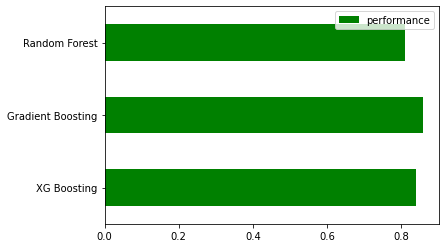

In [51]:
dframe.plot.barh(color='green')